In [29]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import joblib

In [2]:
att = np.load('imp_attributes.npy',allow_pickle=True)
att[:5]

array(['zip', 'number_of_properties', 'year', 'period', 'completions'],
      dtype=object)

In [3]:
df = pd.read_csv('MergedData.csv')
df = df.drop(['Unnamed: 0','zip'],axis=1)
df.head()

,sector,market_name,submarket_name,number_of_properties,metro_code,year,period,completions,vac_pct,asking_rent_pct_chg,...,commuters_by_subway_or_elevated,group_quarters,male_45_64_less_than_9_grade,male_45_64_grade_9_12,male_45_64_high_school,armed_forces,employed_agriculture_forestry_fishing_hunting_mining,employed_information,employed_public_administration,Liking
0,Apartment,Houston,Alief/Kirkwood,47.0,HO,1990.0,Y,0.0,0.099,NaN,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
1,Apartment,Houston,Alief/Kirkwood,47.0,HO,1991.0,Y,0.0,0.101,0.040,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
2,Apartment,Houston,Alief/Kirkwood,47.0,HO,1992.0,Y,0.0,0.088,0.032,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
3,Apartment,Houston,Alief/Kirkwood,47.0,HO,1993.0,Y,0.0,0.072,0.014,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
4,Apartment,Houston,Alief/Kirkwood,47.0,HO,1994.0,Y,0.0,0.059,0.023,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0


In [4]:
label_data = df[~(df['Liking'].isnull())]
unlabel_data  = df[df['Liking'].isnull()]
print(label_data.shape,unlabel_data.shape)
label_data['Liking'].value_counts()

(1488, 87) (66950, 87)


1.0    1209
0.0     279
Name: Liking, dtype: int64

In [5]:
label_data.head()

,sector,market_name,submarket_name,number_of_properties,metro_code,year,period,completions,vac_pct,asking_rent_pct_chg,...,commuters_by_subway_or_elevated,group_quarters,male_45_64_less_than_9_grade,male_45_64_grade_9_12,male_45_64_high_school,armed_forces,employed_agriculture_forestry_fishing_hunting_mining,employed_information,employed_public_administration,Liking
0,Apartment,Houston,Alief/Kirkwood,47.0,HO,1990.0,Y,0.0,0.099,NaN,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
1,Apartment,Houston,Alief/Kirkwood,47.0,HO,1991.0,Y,0.0,0.101,0.040,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
2,Apartment,Houston,Alief/Kirkwood,47.0,HO,1992.0,Y,0.0,0.088,0.032,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
3,Apartment,Houston,Alief/Kirkwood,47.0,HO,1993.0,Y,0.0,0.072,0.014,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
4,Apartment,Houston,Alief/Kirkwood,47.0,HO,1994.0,Y,0.0,0.059,0.023,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0


In [6]:
for i in label_data.columns:
    if label_data[i].dtype =='O':
        print(i,' - ',label_data[i].nunique(),' : ',label_data[i].unique())

sector  -  1  :  ['Apartment']
market_name  -  1  :  ['Houston']
submarket_name  -  5  :  ['Alief/Kirkwood' 'Briar Grove/Westchase' 'Interloop/South Houston'
 'Montrose/River Oaks' 'Braeswood/Bellaire']
metro_code  -  1  :  ['HO']
period  -  2  :  ['Y' 'Y-B']
county_nm  -  1  :  ['Harris']
cbsa_nm  -  1  :  ['Houston-The Woodlands-Sugar Land, TX']
csa_nm  -  1  :  ['Houston-The Woodlands, TX']


In [7]:
for i in label_data:
    if label_data[i].nunique()<2:
        label_data = label_data.drop(i,axis=1)
print(label_data.shape)
label_data.head()

(1488, 81)


,submarket_name,number_of_properties,year,period,completions,vac_pct,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,total_employment,...,commuters_by_subway_or_elevated,group_quarters,male_45_64_less_than_9_grade,male_45_64_grade_9_12,male_45_64_high_school,armed_forces,employed_agriculture_forestry_fishing_hunting_mining,employed_information,employed_public_administration,Liking
0,Alief/Kirkwood,47.0,1990.0,Y,0.0,0.099,NaN,NaN,NaN,1807870.0,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
1,Alief/Kirkwood,47.0,1991.0,Y,0.0,0.101,0.040,-0.2,0.0,1809400.0,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
2,Alief/Kirkwood,47.0,1992.0,Y,0.0,0.088,0.032,1.4,0.0,1823370.0,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
3,Alief/Kirkwood,47.0,1993.0,Y,0.0,0.072,0.014,1.7,0.0,1865200.0,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
4,Alief/Kirkwood,47.0,1994.0,Y,0.0,0.059,0.023,1.4,0.0,1918630.0,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0


In [8]:
data = label_data.drop('Liking',axis=1)
target = label_data['Liking']

In [9]:
data.head()

,submarket_name,number_of_properties,year,period,completions,vac_pct,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,total_employment,...,commuters_by_public_transportation,commuters_by_subway_or_elevated,group_quarters,male_45_64_less_than_9_grade,male_45_64_grade_9_12,male_45_64_high_school,armed_forces,employed_agriculture_forestry_fishing_hunting_mining,employed_information,employed_public_administration
0,Alief/Kirkwood,47.0,1990.0,Y,0.0,0.099,NaN,NaN,NaN,1807870.0,...,1286.0,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0
1,Alief/Kirkwood,47.0,1991.0,Y,0.0,0.101,0.040,-0.2,0.0,1809400.0,...,1286.0,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0
2,Alief/Kirkwood,47.0,1992.0,Y,0.0,0.088,0.032,1.4,0.0,1823370.0,...,1286.0,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0
3,Alief/Kirkwood,47.0,1993.0,Y,0.0,0.072,0.014,1.7,0.0,1865200.0,...,1286.0,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0
4,Alief/Kirkwood,47.0,1994.0,Y,0.0,0.059,0.023,1.4,0.0,1918630.0,...,1286.0,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0


In [10]:
data.isna().sum().sum()

58

In [11]:
for i in data:
    if data[i].isnull().sum()>0:
        print(i)

asking_rent_pct_chg
abs_per_occ_stk_pct
construction_per_absorption


In [12]:
cat_cols = [ ]
for i in label_data.columns:
    if label_data[i].dtypes == 'O':
        cat_cols.append(i)
cat_cols

['submarket_name', 'period']

In [13]:
num_cols = data.columns.drop(cat_cols)
num_cols[:5]

Index(['number_of_properties', 'year', 'completions', 'vac_pct',
       'asking_rent_pct_chg'],
      dtype='object')

## PipeLine

In [14]:
pp_num = Pipeline([
    ('num_imp', SimpleImputer(strategy='median', add_indicator=False)),
    ('rob_num', StandardScaler())
])

pp_cat = Pipeline([
    ('cat_imp', SimpleImputer(strategy='most_frequent', add_indicator=False, fill_value='missing')),
    ('ohe_cat', OneHotEncoder())
])

ct = ColumnTransformer([
    ('pp_num', pp_num, num_cols),
    ('pp_cat', pp_cat, cat_cols)
])

In [15]:
pipe_final = Pipeline([
    ('ct_step', ct),
    ('model', LogisticRegression())
])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.33, random_state=42,stratify=target)

In [17]:
pipe_final.fit(X_train,y_train)

Pipeline(steps=[('ct_step',
                 ColumnTransformer(transformers=[('pp_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('rob_num',
                                                                   StandardScaler())]),
                                                  Index(['number_of_properties', 'year', 'completions', 'vac_pct',
       'asking_rent_pct_chg', 'abs_per_occ_stk_pct',
       'construction_per_absorption', 'total_employment',
       'total_employment_pct_chg', 'office_...
       'male_45_64_grade_9_12', 'male_45_64_high_school', 'armed_forces',
       'employed_agriculture_forestry_fishing_hunting_mining',
       'employed_information', 'employed_public_administration'],
      dtype='object')),
                                                 ('pp_cat',
      

<AxesSubplot:>

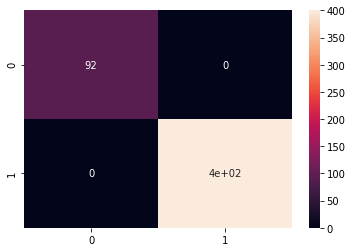

In [19]:
y_pred = pipe_final.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [20]:
att_weights = pd.DataFrame([num_cols,pipe_final[1].coef_[0][:78]]).T
att_weights.columns = ['Attributes','Weights']
att_weights

,Attributes,Weights
0,number_of_properties,0.137982
1,year,-0.008538
2,completions,0.08007
3,vac_pct,-0.023646
4,asking_rent_pct_chg,-0.002247
...,...,...
73,male_45_64_high_school,-0.252985
74,armed_forces,0.084603
75,employed_agriculture_forestry_fishing_hunting_...,0.115433
76,employed_information,-0.01458


In [28]:
joblib.dump(pipe_final,'pipeline.pkl')

['pipeline.pkl']